## Load Data

Pertama yang perlu dilakukan adalah load data terlebih dahulu dari drive. Data ditaruh di drive dikarenakan kemudahan dalam mengakses.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Library
import library yang diperlukan

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity
import operator

## Load Data

Pengecekan data dalam dataset. Dikarenakan terdapat 2 file csv maka akan dilakukan pengecekan beberapa kali.

In [25]:
#pengecekan dataset anime

anime_data = pd.read_csv('/content/drive/MyDrive/data/Anime_Recommendation /anime.csv')
anime_data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [26]:
#pengecekan dataset rating

rating_data = pd.read_csv('/content/drive/MyDrive/data/Anime_Recommendation /rating.csv')
rating_data

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


Pengecekan info dataset

In [27]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [28]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


Pengecekan shape dari dataset yang ada

In [29]:
anime_data.shape

(12294, 7)

In [30]:
rating_data.shape

(7813737, 3)

## Data Pre-Processing

1. Mengubah nama kolom
2. Pembatasan Dataset dikarenakan dataset yang banyak
3. Mengubah Unknown menjadi 0 

In [31]:
#pengubahan nama kolom dalam dataset rating dan anime.
#anime
anime_data.rename(columns = {'rating':'AverageRating'}, inplace = True)

In [32]:
# check dataset anime
anime_data.head()

,anime_id,name,genre,type,episodes,AverageRating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [33]:
rating_data.rename(columns = {'rating':'user_rating'}, inplace = True)

In [34]:
# check dataset rating
rating_data.head()

,user_id,anime_id,user_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [35]:
#pembatasan data
anime_data= anime_data[:1000]
rating_data= rating_data[:1000]

In [36]:
#pengubahan data 'unknown' dalam bagian kolom episode menjadi 0 dan mengubah menjadi int type
anime_data.loc[anime_data["episodes"] == "Unknown", "episodes"] = 0
anime_data["episodes"] = anime_data["episodes"].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Data Analys

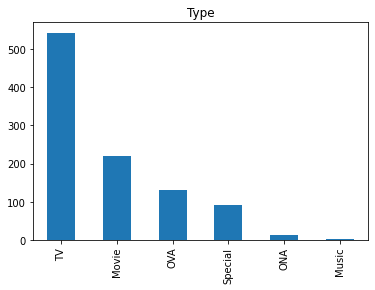

In [37]:
#penghitungan banyaknya anime berdasarkan kategori tipe
count = anime_data["type"].value_counts()
count.plot(kind='bar', title="Type");
 
plt.show()

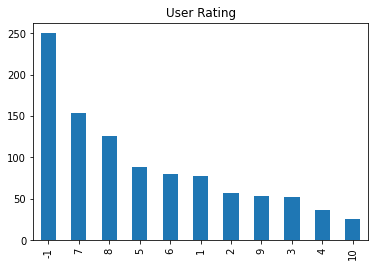

In [38]:
#Penglihatan user rating
count = rating_data["user_rating"].value_counts()
count.plot(kind='bar', title="User Rating");
 
plt.show()

## Data Pre-Paration

### Anime Dataset

In [39]:
# Pengechekan missing value dan menghapusnya
anime_data.isna().sum()

anime_id         0
name             0
genre            0
type             0
episodes         0
AverageRating    0
members          0
dtype: int64

In [40]:
anime_data = anime_data.dropna()

In [46]:
#melihat jumlah data
anime_data.shape

(1000, 7)

### Rating Dataset

Untuk rating dataset hanya dilakukan perubahan -1 menjadi NaN karena akan dilakukan menghitung peringkat rata-rata per pengguna dan tidak ingin rata-rata terdistorsi

In [42]:
rating_data.user_rating.replace({-1: np.nan}, regex=True, inplace = True)
rating_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,user_id,anime_id,user_rating
0,1,20,NaN
1,1,24,NaN
2,1,79,NaN
3,1,226,NaN
4,1,241,NaN


In [43]:
rating_data.isna().sum()

user_id          0
anime_id         0
user_rating    250
dtype: int64

In [44]:
rating_data = rating_data.dropna()

In [45]:
rating_data.isna().sum()

user_id        0
anime_id       0
user_rating    0
dtype: int64

In [47]:
rating_data.shape

(750, 3)

## Content Based Filtering
Content Based Filtering adalah sistem rekomendasi yang merekomendasikan item sesuai dengan item yang disukai oleh pengguna di masa lampau.

### Data Preparation in content filtering

In [49]:
anime_data.head()

,anime_id,name,genre,type,episodes,AverageRating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Melakukan perubahan dataframe anime menjadi list yang ada

In [50]:
#anime id
anime_id = anime_data['anime_id'].tolist()
#anime name
anime_name = anime_data['name'].tolist()
#anime genre
anime_genre = anime_data['genre'].tolist()
#anime type
anime_type = anime_data['type'].tolist()
#episode dari anime
anime_episodes = anime_data['episodes'].tolist()
#Average rating dari anime
anime_AveRat = anime_data['AverageRating'].tolist()
#Member dari "group" di anime
anime_members = anime_data['members'].tolist()


In [52]:
#pembuatan dictionary
anime = pd.DataFrame({
    'anime_id': anime_id,
    'anime_name': anime_name,
    'anime_genre': anime_genre,
    'anime_type': anime_type,
    'anime_episodes': anime_episodes,
    'anime_rating': anime_AveRat,
    'anime_members': anime_members,
})
anime

,anime_id,anime_name,anime_genre,anime_type,anime_episodes,anime_rating,anime_members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
995,132,GetBackers,"Action, Comedy, Drama, Mystery, Shounen, Super...",TV,49,7.73,73536
996,14467,K,"Action, Super Power, Supernatural",TV,13,7.73,297051
997,8532,Katekyo Hitman Reborn! Special,"Comedy, Shounen",ONA,1,7.73,19991
998,1606,Kekkaishi,"Adventure, Comedy, Fantasy, Shounen",TV,52,7.73,61884


### Modelling 

Menggunakan TF-IDF Vectorizer untuk membangun sistem rekomendasi berdasarkan penulis buku. TF-IDF yang merupakan kepanjangan dari Term Frequency-Inverse Document Frequency memiliki fungsi untuk mengukur seberapa pentingnya suatu kata terhadap kata - kata lain dalam dokumen.


In [53]:
#dalam sistem rekomendasi anime ini akan menggunakan type dari anime

from sklearn.feature_extraction.text import TfidfVectorizer
 
tf = TfidfVectorizer()
tf.fit(anime['anime_type']) 
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['movie', 'music', 'ona', 'ova', 'special', 'tv']

In [54]:
#fit dan transformasi matrix
tfidf_matrix = tf.fit_transform(anime['anime_type']) 
tfidf_matrix.shape 

(1000, 6)

In [55]:
#mengubah vektor menjadi matrix
tfidf_matrix.todense()

matrix([[1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        ...,
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0.]])

In [59]:
#melihat dataframe berdasarkan matrix antara nama anime (judul) dengan type
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=anime.anime_name
).sample(6, axis=1,replace=True).sample(6, axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,movie,tv,movie,special,ova,ova
anime_name,,,,,,
Tengen Toppa Gurren Lagann Movie: Gurren-hen,1.0,0.0,1.0,0.0,0.0,0.0
Kuroko no Basket: Baka ja Katenai no yo!,0.0,0.0,0.0,0.0,1.0,1.0
Zetsuen no Tempest,0.0,1.0,0.0,0.0,0.0,0.0
Danganronpa 3: The End of Kibougamine Gakuen - Zetsubou-hen,0.0,1.0,0.0,0.0,0.0,0.0
Tiger &amp; Bunny Movie 2: The Rising,1.0,0.0,1.0,0.0,0.0,0.0
Kaiba,0.0,1.0,0.0,0.0,0.0,0.0


In [60]:
# penggunaan cosine similarity untuk dapat melakukan rekomendasi
from sklearn.metrics.pairwise import cosine_similarity
 
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [61]:
#pembuatan dataframe dengan baris dan kolom adalah judul anime

cosine_sim_df = pd.DataFrame(cosine_sim, index=anime['anime_name'], columns=anime['anime_name'])

fungsi dibawah merupakan fungsi untuk mendapatkan rekomendasi berbasis tipe anime k sebagai jumlah rekomendasi yang diingkan, dalam fungsi ini, kita akan mendapatkan 5 rekomendasi

Atribut argpartition berguna untuk mengambil sejumlah nilai k, dalam fungsi ini 5 tertinggi dari tingkat kesamaan yang berasal dari dataframe cosine_sim_df.


In [62]:
def anime_type_recommendation(i, M, items, k=5):
    ix = M.loc[:,i].to_numpy().argpartition(range(-1,-k,-1))
    closest = M.columns[ix[-1:-(k+2):-1]]
    closest = closest.drop(i, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [64]:
#dataframe anime yang sudah di tonton
anime_ditonton = "Kaiba"
anime[anime.anime_name.eq(anime_ditonton)]

,anime_id,anime_name,anime_genre,anime_type,anime_episodes,anime_rating,anime_members
230,3701,Kaiba,"Adventure, Mystery, Romance, Sci-Fi",TV,12,8.29,56927


In [65]:
#testing rekomendasi
recommendations = anime_type_recommendation(anime_ditonton, cosine_sim_df, anime[['anime_name', 'anime_type']])

In [66]:
#show recommendations
recommendations

,anime_name,anime_type
0,Saint Seiya,TV
1,Uchouten Kazoku,TV
2,Baby Steps,TV
3,Kindaichi Shounen no Jikenbo (TV),TV
4,Tentai Senshi Sunred,TV


### Evaluation

evaluasi yang digunakan akan menggunakan accuracy

- Variabel anime_ditonton di bawah ini akan mengambil satu row anime buku yang pernah ditonton sebelumnya.

- variabel anime_type_ditonton adalah type anime dari anime yang pernah ditonton sebelumnya.


In [68]:
anime_ditonton = anime[anime.anime_name == anime_ditonton]
anime_type_ditonton = anime_ditonton.iloc[0]["anime_type"]


In [70]:
#variabel anime_recommendation_type yang berisikan sebuah list 
#type anime yang direkomendasikan oleh sistem

anime_recommendation_type = recommendations.anime_type

In [71]:
#proses pengecekan setiap type dari anime yang direkomendasikan jika sama, 
#maka variabel type_asli akan bertambah 1
type_asli = 0
for i in range(5):
    if anime_recommendation_type[i] == anime_type_ditonton:
        type_asli+=1

In [73]:
Accuracy = type_asli/5*100
print("Accuracy dari model adalah {}%".format(Accuracy))

Accuracy dari model adalah 100.0%


## Collaborative Filtering Recommended System 

Collaborative Based Filtering adalah sistem rekomendasi berdasarkan dari komunitas penyuka anime lain.

### Data Preparation di collaborative recommended system


In [74]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = rating_data['user_id'].unique().tolist()
print('list user ID: ', user_ids)
     
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
     
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list user ID:  [1, 2, 3, 5, 7]
encoded userID :  {1: 0, 2: 1, 3: 2, 5: 3, 7: 4}
encoded angka ke userID:  {0: 1, 1: 2, 2: 3, 3: 5, 4: 7}


In [75]:
#
anime_ids = rating_data['anime_id'].unique().tolist()
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}

#petakan user_id dan anime_id ke dataframe yang berkaitan.
rating_data['user'] = rating_data['user_id'].map(user_to_user_encoded)
rating_data['anime'] = rating_data['anime_id'].map(anime_to_anime_encoded)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


cek beberapa hal dalam data seperti jumlah user, type anime, dan mengubah nilai rating menjadi float.

In [77]:


num_users = len(user_encoded_to_user)
print(num_users)
num_anime = len(anime_to_anime_encoded)
print(num_anime)
rating_data['user_rating'] = rating_data['user_rating'].values.astype(np.float32)

min_rating = min(rating_data['user_rating'])
max_rating = max(rating_data['user_rating'])
 
print('Number of User: {}, Number of anime: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_anime, min_rating, max_rating
))



5
616
Number of User: 5, Number of anime: 616, Min Rating: 1.0, Max Rating: 10.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Split Dataset

In [78]:
rating_data= rating_data.sample(frac=1, random_state=42)
rating_data

,user_id,anime_id,user_rating,user,anime
716,5,22147,6.0,3,470
566,5,11853,6.0,3,333
338,5,245,10.0,3,126
457,5,4999,5.0,3,233
507,5,8525,3.0,3,280
...,...,...,...,...,...
222,3,20507,8.0,2,68
311,5,47,8.0,3,102
478,5,6512,2.0,3,253
645,5,17777,1.0,3,405


membagi dataset yang ada menjadi 70% untuk latihan dan 30% untuk validasi

In [80]:
x = rating_data[['user', 'anime']].values
 
y = rating_data['user_rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
train_indices = int(0.70 * rating_data.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[  3 470]
 [  3 333]
 [  3 126]
 ...
 [  3 253]
 [  3 405]
 [  3  98]] [0.55555556 0.55555556 1.         0.44444444 0.22222222 0.55555556
 0.66666667 0.22222222 0.33333333 0.66666667 0.77777778 0.
 0.         0.66666667 0.44444444 0.44444444 0.55555556 0.
 0.33333333 0.11111111 0.11111111 0.         0.11111111 0.66666667
 0.66666667 1.         0.         0.         0.44444444 0.77777778
 0.22222222 0.33333333 0.22222222 0.66666667 0.44444444 0.55555556
 0.44444444 0.11111111 0.55555556 0.66666667 0.55555556 0.77777778
 0.77777778 0.44444444 0.77777778 0.66666667 0.77777778 0.33333333
 0.11111111 0.11111111 0.55555556 0.22222222 0.44444444 0.22222222
 0.         0.55555556 0.11111111 0.77777778 0.44444444 0.77777778
 0.77777778 0.22222222 0.77777778 0.77777778 0.         0.11111111
 0.         1.         0.         0.66666667 0.44444444 0.33333333
 0.55555556 0.77777778 0.66666667 0.44444444 0.55555556 0.88888889
 0.66666667 0.44444444 0.44444444 0.66666667 0.66666667 0.88888889
 0.666

### Modelling

model yang dipakai adalah RecommenderNet

In [81]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [82]:
class RecommenderNet(tf.keras.Model):
 
  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_resto
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.resto_embedding = layers.Embedding( 
        num_resto,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_resto, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    resto_vector = self.resto_embedding(inputs[:, 1])
    resto_bias = self.resto_bias(inputs[:, 1]) 
 
    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2) 
 
    x = dot_user_resto + user_bias + resto_bias
    
    return tf.nn.sigmoid(x) 

In [84]:
#compile model
model = RecommenderNet(num_users, num_anime, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [85]:
#training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 5,
    epochs = 20,
    validation_data = (x_val, y_val)
)



Epoch 1/20
105/105 [==============================] - 2s 9ms/step - loss: 0.7137 - root_mean_squared_error: 0.3067 - val_loss: 0.6898 - val_root_mean_squared_error: 0.2758
Epoch 2/20
105/105 [==============================] - 1s 5ms/step - loss: 0.7074 - root_mean_squared_error: 0.3012 - val_loss: 0.6809 - val_root_mean_squared_error: 0.2680
Epoch 3/20
105/105 [==============================] - 1s 6ms/step - loss: 0.6889 - root_mean_squared_error: 0.2850 - val_loss: 0.6759 - val_root_mean_squared_error: 0.2635
Epoch 4/20
105/105 [==============================] - 1s 5ms/step - loss: 0.6648 - root_mean_squared_error: 0.2659 - val_loss: 0.6717 - val_root_mean_squared_error: 0.2595
Epoch 5/20
105/105 [==============================] - 1s 5ms/step - loss: 0.6595 - root_mean_squared_error: 0.2607 - val_loss: 0.6675 - val_root_mean_squared_error: 0.2554
Epoch 6/20
105/105 [==============================] - 1s 5ms/step - loss: 0.6431 - root_mean_squared_error: 0.2457 - val_loss: 0.6644 - val_

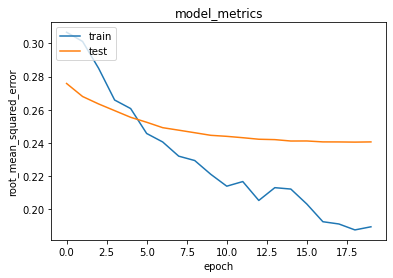

In [86]:
#visualisasi metrics
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Mendapatkan Rekomendasi

In [87]:
anime_dataset =  anime
rating_dataset = rating_data

code dibawah digunakan untuk mengambil user_id secara acak dari rating_dataset. Dari user_id ini perlu mengetahui buku - buku apa saja yang pernah dibaca dan yang belum pernah dibaca, sehingga dapat merekomendasikan buku - buku yang belum dibaca.

In [89]:
user_id = rating_dataset.user_id.sample(1).iloc[0]
anime_have_been_watch_by_user = rating_dataset[rating_dataset.user_id == user_id]
 
anime_have_not_been_watch_by_user = anime_dataset[anime_dataset['anime_id'].isin(anime_have_been_watch_by_user.anime_id.values)]['anime_id'] 
anime_have_not_been_watch_by_user = list(
    set(anime_have_not_been_watch_by_user)
    .intersection(set(anime_to_anime_encoded.keys()))
)
 
anime_have_not_been_watch_by_user = [[anime_to_anime_encoded.get(x)] for x in anime_have_not_been_watch_by_user]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(anime_have_not_been_watch_by_user), anime_have_not_been_watch_by_user)
)

In [94]:
#rekomendasi anime
ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_encoded_to_anime.get(anime_have_not_been_watch_by_user[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Anime with high ratings from user')
print('----' * 8)


top_anime_recommended = (
    anime_have_been_watch_by_user.sort_values(
        by = 'user_rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)
 
anime_row = anime_dataset[anime_dataset['anime_id'].isin(top_anime_recommended)]
for row in anime_row.itertuples():
    print(row.anime_name, ':', row.anime_type)
 
print('----' * 8)
print('Top 10 Anime Recommendation for user: {}'.format(user_id))
print('----' * 8)
 
recommended_anime= anime_dataset[anime_dataset['anime_id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print(row.anime_name, ':', row.anime_type)

Showing recommendations for users: 3
Anime with high ratings from user
--------------------------------
Fullmetal Alchemist: Brotherhood : TV
Death Note : TV
Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai. : TV
Shokugeki no Souma : TV
Pokemon: The Origin : Special
--------------------------------
Top 10 Anime Recommendation for user: 3
--------------------------------
Sen to Chihiro no Kamikakushi : Movie
Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai. : TV
Slam Dunk : TV
Magi: The Kingdom of Magic : TV
Kotonoha no Niwa : Movie
Magi: The Labyrinth of Magic : TV
Paprika : Movie
Byousoku 5 Centimeter : Movie
Pokemon: The Origin : Special
Digimon Adventure : TV
